In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [126]:
df.shape

(4746, 12)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [128]:
df.drop(['Posted On', 'Area Locality', 'Floor'], axis=1, inplace=True)

In [129]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [130]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [131]:
print("Data duplikat sebelum dibersihkan :", df.duplicated().sum())

Data duplikat sebelum dibersihkan : 260


In [132]:
df.drop_duplicates(inplace=True)
print("Data duplikat setelah dibersihkan :", df.duplicated().sum() )

Data duplikat setelah dibersihkan : 0


<Axes: xlabel='Rent'>

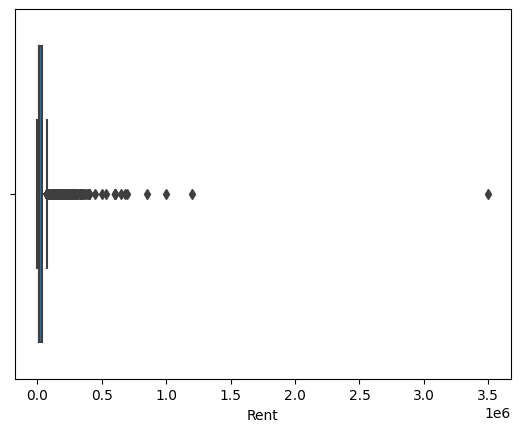

In [133]:
sns.boxplot(x='Rent', data=df)

In [134]:
df[df.Rent > 3000000]
df.drop([1837], axis='rows', inplace= True)

<Axes: xlabel='Rent'>

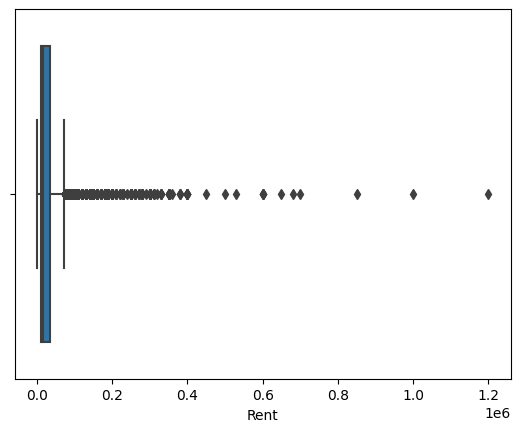

In [135]:
sns.boxplot(x='Rent', data=df)

<Axes: xlabel='BHK'>

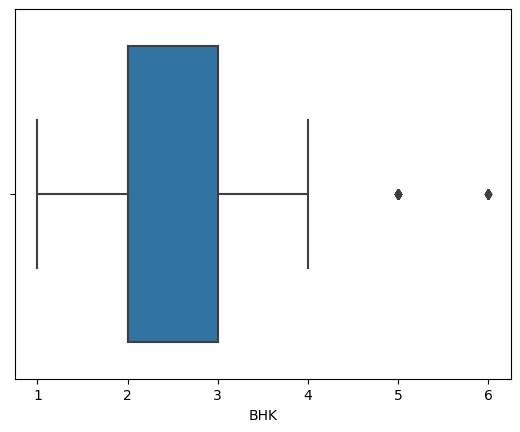

In [136]:
sns.boxplot(x='BHK', data=df)

<Axes: xlabel='Size'>

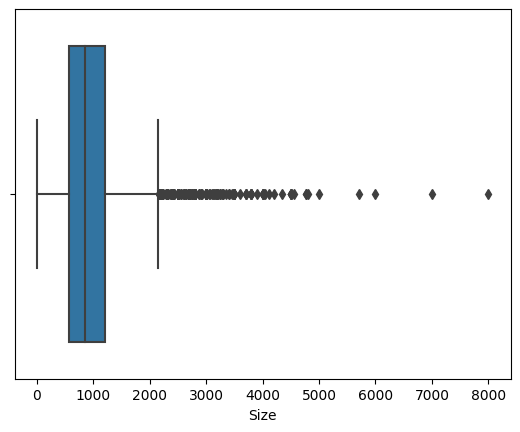

In [137]:
sns.boxplot(x='Size', data=df)

In [138]:
print("data",df[df.Size > 2500].count())

data BHK                  129
Rent                 129
Size                 129
Area Type            129
City                 129
Furnishing Status    129
Tenant Preferred     129
Bathroom             129
Point of Contact     129
dtype: int64


<Axes: xlabel='Bathroom'>

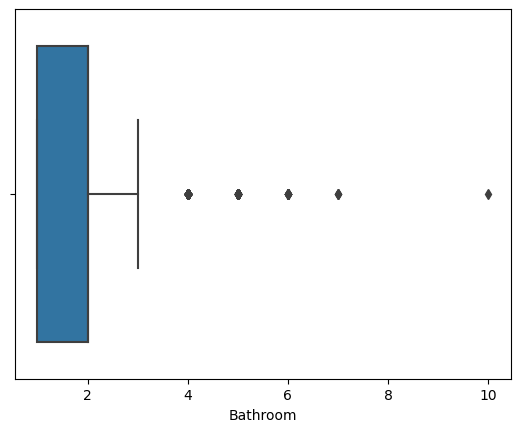

In [139]:
sns.boxplot(x='Bathroom', data=df)

In [140]:
# Hitung Q1 dan Q3
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identifikasi outlier
outliers = df[(df['Rent'] > upper_bound)]

print("Outlier dalam kolom 'Rent':")
print(outliers.count())


Outlier dalam kolom 'Rent':
BHK                  461
Rent                 461
Size                 461
Area Type            461
City                 461
Furnishing Status    461
Tenant Preferred     461
Bathroom             461
Point of Contact     461
dtype: int64


In [141]:
df['Point of Contact'].value_counts()

Contact Owner      3001
Contact Agent      1483
Contact Builder       1
Name: Point of Contact, dtype: int64

In [142]:
df['Bathroom'].value_counts()

2     2160
1     1365
3      732
4      153
5       60
6       11
7        3
10       1
Name: Bathroom, dtype: int64

In [143]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3203
Bachelors            813
Family               469
Name: Tenant Preferred, dtype: int64

In [144]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2124
Unfurnished       1701
Furnished          660
Name: Furnishing Status, dtype: int64

In [145]:
df['City'].value_counts()

Mumbai       945
Chennai      837
Bangalore    807
Hyderabad    806
Delhi        590
Kolkata      500
Name: City, dtype: int64

In [146]:
df['Area Type'].value_counts()

Super Area     2250
Carpet Area    2233
Built Area        2
Name: Area Type, dtype: int64

In [147]:
df['Size'].value_counts()

1000    213
600     205
800     198
1200    177
700     173
       ... 
1252      1
904       1
721       1
2110      1
855       1
Name: Size, Length: 615, dtype: int64

In [148]:
df['BHK'].value_counts()

2    2121
3    1077
1    1074
4     186
5      19
6       8
Name: BHK, dtype: int64

In [149]:
df.corr()

<ipython-input-149-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.466569,0.712571,0.790450
Rent,0.466569,1.000000,0.511545,0.559972
Size,0.712571,0.511545,1.000000,0.738107
Bathroom,0.790450,0.559972,0.738107,1.000000


In [150]:
numerikal = df.select_dtypes(include=np.number).columns.tolist()
kategorikal = df.select_dtypes(exclude = np.number).columns.tolist()

In [151]:
numerikal

['BHK', 'Rent', 'Size', 'Bathroom']

In [152]:
kategorikal

['Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [153]:
dfss = pd.get_dummies(df, columns=kategorikal)
dfss.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [155]:
X = dfss.drop('Rent', axis=1)
y = dfss['Rent']


In [156]:
X

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,800,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,1000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,800,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,850,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4742,3,2000,3,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4743,3,1750,3,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4744,3,1500,2,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [158]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Akurasi Pelatihan:", linreg.score(X_train,y_train))
print("Akurasi Testing:", linreg.score(X_test,y_test))

Akurasi Pelatihan: 0.5059710557961734
Akurasi Testing: 0.5329513192428532


In [159]:
y_pred = linreg.predict(X_test)

In [160]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Absolute Error (MAE): 21931.54164952744
Mean Squared Error (MSE): 1377048740.7224853
Root Mean Squared Error (RMSE): 37108.60736705819
R2 Score: 0.5329513192428532


In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [162]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Akurasi Pelatihan:", linreg.score(X_train,y_train))
print("Akurasi Testing:", linreg.score(X_test,y_test))

Akurasi Pelatihan: 0.5059710557961734
Akurasi Testing: 0.5329513192428532


In [163]:
y_pred = linreg.predict(X_test)

In [164]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Absolute Error (MAE): 21931.54164952744
Mean Squared Error (MSE): 1377048740.7224853
Root Mean Squared Error (RMSE): 37108.60736705819
R2 Score: 0.5329513192428532
